In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(url)

# Convert the 'date' column to datetime objects if you intend to use it in any time-based analysis
df['date'] = pd.to_datetime(df['date'])

# Renaming columns
df = df.rename(columns={
    'Appliances': 'Appliances',
    'lights': 'Lights',
    'T1': 'Kitchen_Temp',
    'RH_1': 'Kitchen_Humidity',
    'T2': 'LivingRoom_Temp',
    'RH_2': 'LivingRoom_Humidity',
    'T3': 'LaundryRoom_Temp',
    'RH_3': 'LaundryRoom_Humidity',
    'T4': 'OfficeRoom_Temp',
    'RH_4': 'OfficeRoom_Humidity',
    'T5': 'Bathroom_Temp',
    'RH_5': 'Bathroom_Humidity',
    'T6': 'OutsideNorth_Temp',
    'RH_6': 'OutsideNorth_Humidity',
    'T7': 'IroningRoom_Temp',
    'RH_7': 'IroningRoom_Humidity',
    'T8': 'TeenagerRoom_Temp',
    'RH_8': 'TeenagerRoom_Humidity',
    'T9': 'ParentRoom_Temp',
    'RH_9': 'ParentRoom_Humidity',
    'T_out': 'Outside_Temp',
    'Press_mm_hg': 'Atmospheric_Pressure',
    'RH_out': 'Outside_Humidity',
    'rv1': 'Random_Var1',
    'rv2': 'Random_Var2'

})


# Display the first few rows
df.head()


,date,Appliances,Lights,Kitchen_Temp,Kitchen_Humidity,LivingRoom_Temp,LivingRoom_Humidity,LaundryRoom_Temp,LaundryRoom_Humidity,OfficeRoom_Temp,...,ParentRoom_Temp,ParentRoom_Humidity,Outside_Temp,Atmospheric_Pressure,Outside_Humidity,Windspeed,Visibility,Tdewpoint,Random_Var1,Random_Var2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


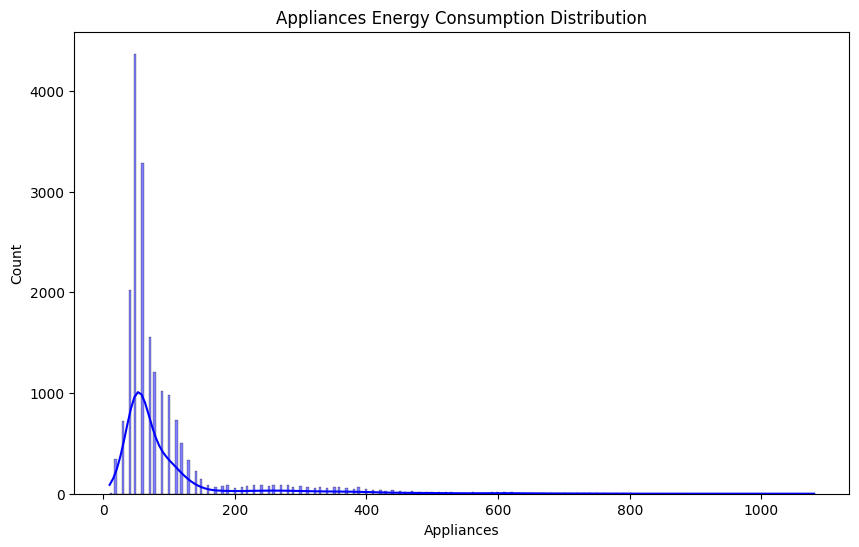

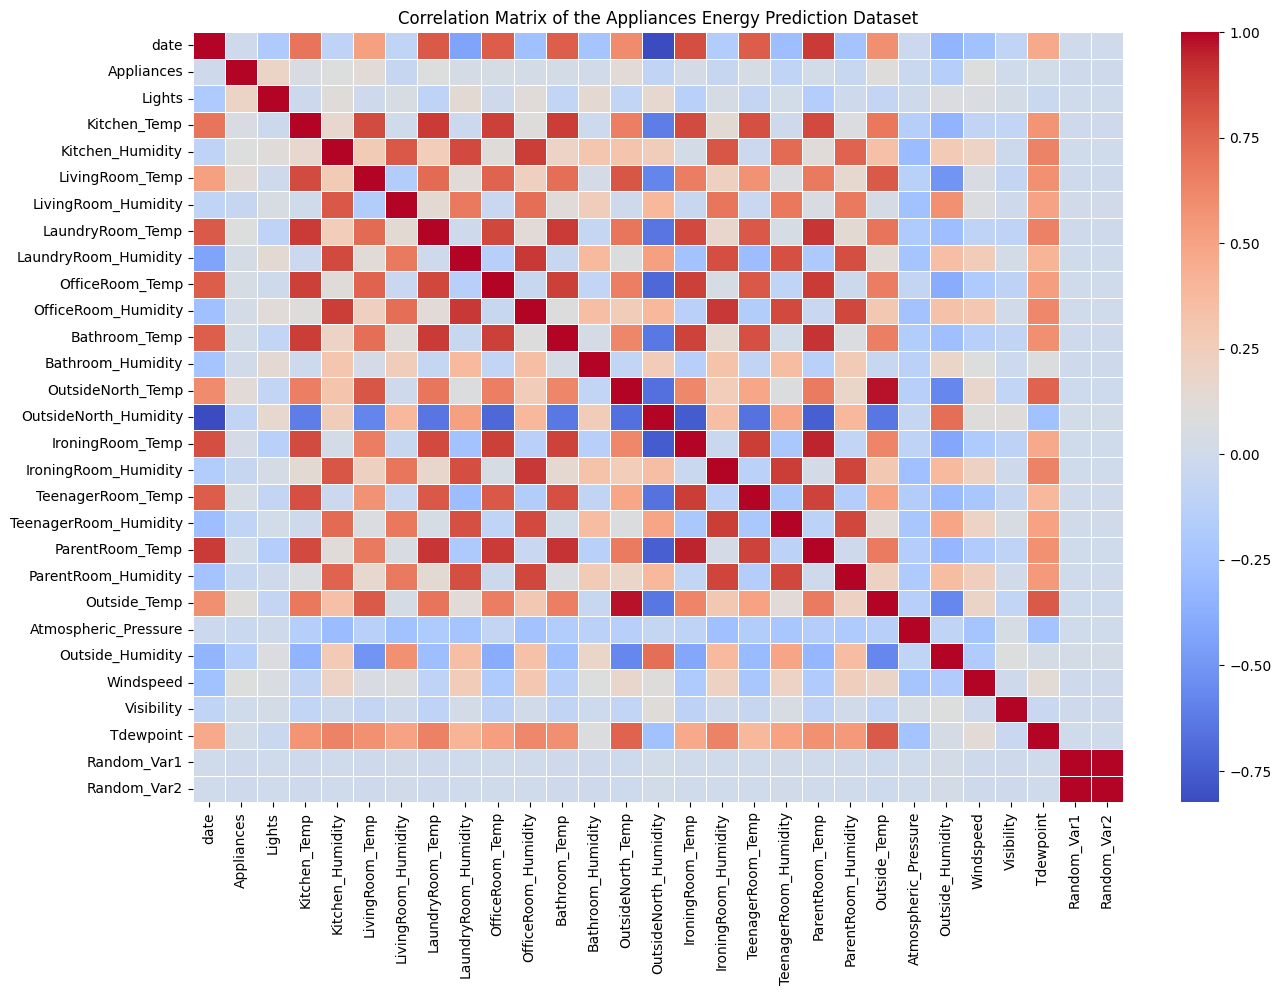

In [30]:
# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Visualize the distribution of the target variable (Appliances energy consumption)
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], kde=True, color='blue')
plt.title('Appliances Energy Consumption Distribution')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the Appliances Energy Prediction Dataset')
plt.show()

# Use Plotly for an interactive scatter plot between Temperature and Energy Consumption
fig = px.scatter(df, x='Kitchen_Temp', y='Appliances', trendline='ols',
                 trendline_color_override="green",
                 title='Temperature vs. Appliances Energy Consumption')

fig.update_layout(xaxis_title='Kitchen Temperature (C)', yaxis_title='Appliances Energy Consumption (Wh)')


fig.show()


Train a Machine Learning Model

In [25]:
# Drop the 'date' column since it's not needed for the prediction
df.drop(columns=['date'], inplace=True)

# Features and target variable
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Root Mean Squared Error: 68.37
R-squared: 0.53


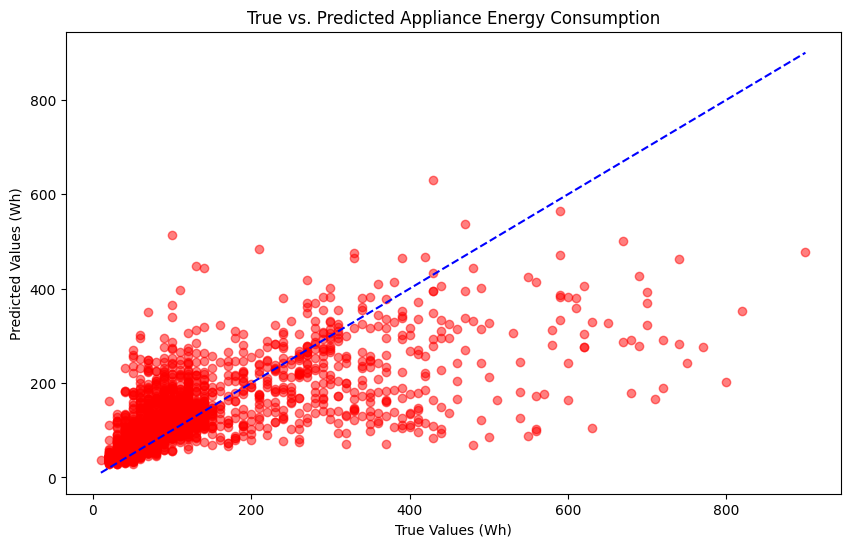

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--b')
plt.xlabel('True Values (Wh)')
plt.ylabel('Predicted Values (Wh)')
plt.title('True vs. Predicted Appliance Energy Consumption')
plt.show()


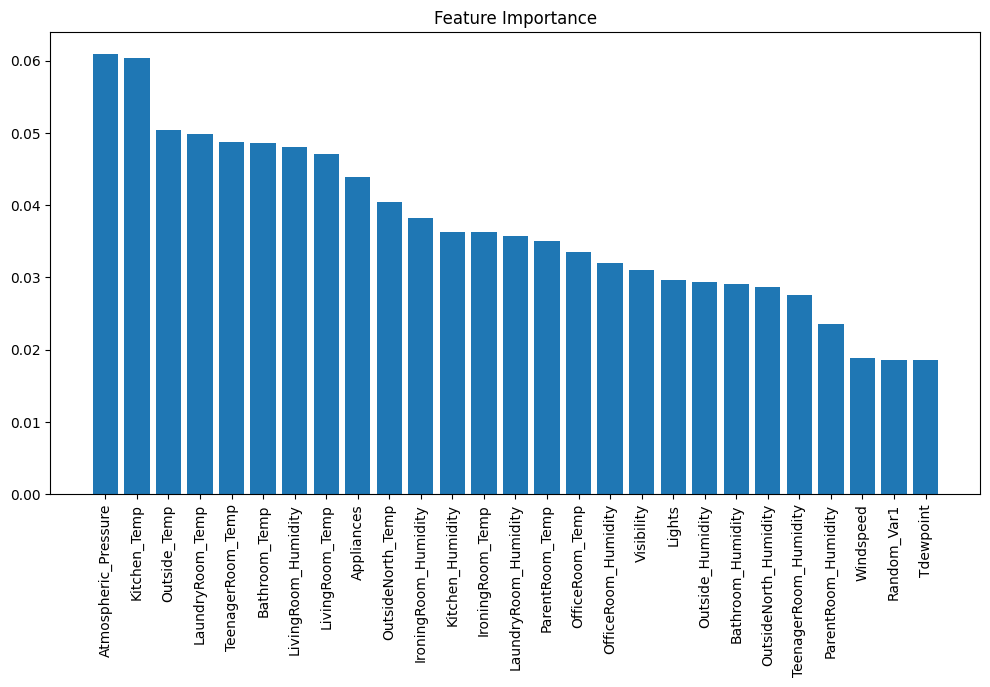

In [28]:
# Get feature importances from the model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [df.columns[i] for i in indices], rotation=90)
plt.show()
